In [162]:
# notebook for visualizing plane MILP results

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import clear_output

In [163]:
!rm ./files/b-inv.txt
!python3 ./b-inv-part/main.py ./files/plane.lp >> ./files/b-inv.txt

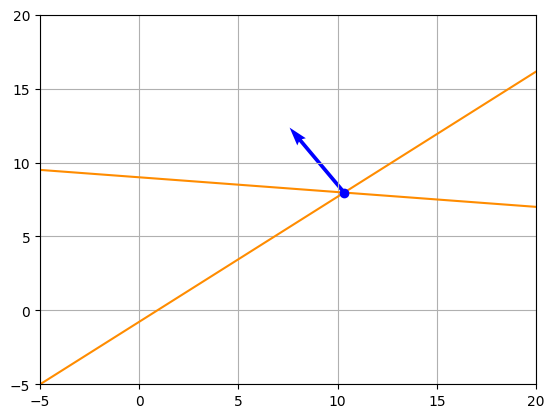

In [164]:
from pysmps import smps_loader as mps
from pyscipopt import LP


signs = mps.load_mps("./files/plane.mps")[5]
obj = mps.load_mps("./files/plane.mps")[6]
a_matrix = mps.load_mps("./files/plane.mps")[7]
rhs = mps.load_mps("./files/plane.mps")[9]['RHS']

constraints = zip(signs, a_matrix, rhs)

x = np.array([-10 + 0.1 * i for i in range(0, 1001)])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.set_ylim(-5, 20)
ax.set_xlim(-5, 20)

for sign, row, rhs in constraints:
    y = (rhs - row[0] * x) / row[1]
    ax.plot(x, y, 'darkorange')

lp = LP()
lp.readLP(b"./files/plane.mps")
lp.solve()
x_r, y_r = lp.getPrimal()

ax.plot(x_r, y_r, 'ob')

V = np.array(-obj)
origin = np.array([[x_r],[y_r]])

ax.quiver(*origin, V[0], V[1], color=['b'], scale=100)

plt.show()

In [191]:
from pyscipopt import Model

milp = Model()
milp.readProblem("./files/plane.lp")
milp.optimize()

clear_output()

"{'t_x': 8.0, 't_y': 6.0}"

{'t_x': 8.0, 't_y': 6.0}